# Problem Description

In this project, I have used Natural Language Processing (NLP) for doing sentiment analysis on Yelp user reviews data.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.tail(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [5]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [7]:
df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

# Visualize Data

In [8]:
df['length'] = df['text'].apply(len)

In [9]:
df.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


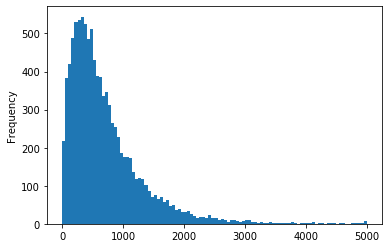

In [10]:
df['length'].plot(bins = 100, kind = 'hist')

In [11]:
df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [12]:
df[ df['length'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [13]:
df[ df['length'] == 710]['text'].iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

In [14]:
df[ df['length'] == 1]['text'].iloc[0]

'X'

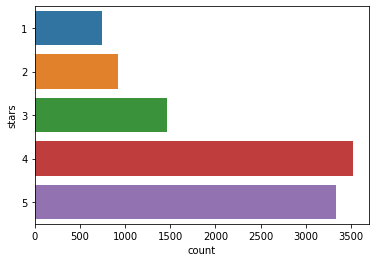

In [15]:
sns.countplot(y = 'stars', data = df)

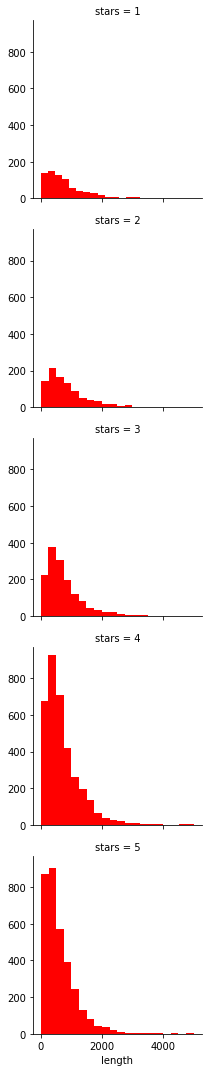

In [16]:
g = sns.FacetGrid(data = df, col = 'stars', col_wrap = 1)
g.map(plt.hist, 'length', bins = 20, color = 'red')

In [17]:
df_1 = df[df['stars'] == 1]

In [18]:
df_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
65,6Ry-gjGqApTSRZkfdYlLmw,2011-05-04,LN4l4wklQB0IVBjm-vq9TA,1,Not busy at all but took nearly 45 min to get ...,review,rWN1pg3mCF2btJWtG6JmJA,0,1,0,304
71,NNGJQF3WeIHzGzweCpZ-VA,2011-04-23,jNewOjPp56NMDrKlajrgFQ,1,"Yikes, reading other reviews I realize my bad ...",review,5je-Jg8tq5BWxJtDBmTK2Q,0,6,1,877
79,FkHhy6kWeoJf0xJTqzRWmg,2012-09-17,odua8qFSMEXSFYmElQTspQ,1,This is my first year participating in Arizona...,review,68exKLCQnnZrvXNFOcIUnA,0,0,0,154
84,LzpR_jE6VIutJ08s2cdRrw,2009-03-18,EUCqs_gfKZi1YoKVkWjSYw,1,"really, I can't believe this place has receive...",review,HY9qpAamqLXFoa7xMwNntg,1,1,3,2646
89,145SQ_msdQ1yo7J0E63VoA,2011-03-15,VqNdpXrssjJrC0Z_swPUdA,1,"I was really excited about this event, maybe m...",review,ASi6ZgbbwXIwU2H24uANmQ,0,1,0,610


In [19]:
df_5 = df[df['stars']== 5]

In [20]:
df_1_5 = pd.concat([df_1, df_5])

In [21]:
df_1_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
65,6Ry-gjGqApTSRZkfdYlLmw,2011-05-04,LN4l4wklQB0IVBjm-vq9TA,1,Not busy at all but took nearly 45 min to get ...,review,rWN1pg3mCF2btJWtG6JmJA,0,1,0,304
71,NNGJQF3WeIHzGzweCpZ-VA,2011-04-23,jNewOjPp56NMDrKlajrgFQ,1,"Yikes, reading other reviews I realize my bad ...",review,5je-Jg8tq5BWxJtDBmTK2Q,0,6,1,877
79,FkHhy6kWeoJf0xJTqzRWmg,2012-09-17,odua8qFSMEXSFYmElQTspQ,1,This is my first year participating in Arizona...,review,68exKLCQnnZrvXNFOcIUnA,0,0,0,154
84,LzpR_jE6VIutJ08s2cdRrw,2009-03-18,EUCqs_gfKZi1YoKVkWjSYw,1,"really, I can't believe this place has receive...",review,HY9qpAamqLXFoa7xMwNntg,1,1,3,2646
89,145SQ_msdQ1yo7J0E63VoA,2011-03-15,VqNdpXrssjJrC0Z_swPUdA,1,"I was really excited about this event, maybe m...",review,ASi6ZgbbwXIwU2H24uANmQ,0,1,0,610


In [22]:
df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
length         4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [23]:
print('1-Star Review Percentage =', (len(df_1)/len(df_1_5))*100, '%')

1-Star Review Percentage = 18.330885952031327 %


In [24]:
print('5-Star Review Percentage =', (len(df_5)/len(df_1_5))*100, '%')

5-Star Review Percentage = 81.66911404796868 %


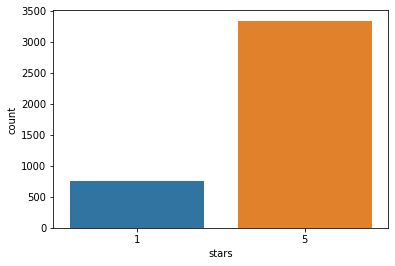

In [25]:
sns.countplot(df_1_5['stars'], label = 'Count')

# Data Cleaning

## Remove Punctuations and Stopwords

In [26]:
import string 
string.punctuation
from nltk.corpus import stopwords


In [27]:
def data_cleaning(data):
    data_punc_removed = [char     for char in data if char not in string.punctuation]
    data_punc_removed_join = ''.join(data_punc_removed)
    data_punc_removed_join_clean = [word    for word in data_punc_removed_join.split() if word.lower() not in stopwords.words('english')           ]
    return data_punc_removed_join_clean

In [28]:
df_clean = df_1_5['text'].apply(data_cleaning)

In [29]:
print(df_1_5['text'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [30]:
print(df_clean[0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [31]:
df_1_5['length'].describe()

count    4086.000000
mean      661.938815
std       601.621371
min         6.000000
25%       256.000000
50%       489.500000
75%       878.000000
max      4986.000000
Name: length, dtype: float64

In [32]:
df_1_5[ df_1_5['length'] == 662]['text'].iloc[0]

"Coming from a French family on my mom's side it is ingrained in my genes to love cooking, food, and shops like Sur La Table...oh and also wine and cheese...what a tough life I live!\n\nSur La Table is a classy cooking shop which offers high end cooking ware, appliances, and also dishes. Somethings in the store can be pricey, but you can also find good deals as well. They offer many cooking things you wouldn't find at your average Crate and Barrel for more complicated cooking endeavors. I have also found some cute cookie cutters here for my mom's collection. The staff was all very helpful and knowledgeable. and many Sur La Table's now offer cooking classes!"

In [33]:
df_1_5[ df_1_5['length'] == 662]['text']

3571    Coming from a French family on my mom's side i...
7169    Habaneros is an awesome little gem stuck in th...
Name: text, dtype: object

In [34]:
print(df_clean[3571])

['Coming', 'French', 'family', 'moms', 'side', 'ingrained', 'genes', 'love', 'cooking', 'food', 'shops', 'like', 'Sur', 'La', 'Tableoh', 'also', 'wine', 'cheesewhat', 'tough', 'life', 'live', 'Sur', 'La', 'Table', 'classy', 'cooking', 'shop', 'offers', 'high', 'end', 'cooking', 'ware', 'appliances', 'also', 'dishes', 'Somethings', 'store', 'pricey', 'also', 'find', 'good', 'deals', 'well', 'offer', 'many', 'cooking', 'things', 'wouldnt', 'find', 'average', 'Crate', 'Barrel', 'complicated', 'cooking', 'endeavors', 'also', 'found', 'cute', 'cookie', 'cutters', 'moms', 'collection', 'staff', 'helpful', 'knowledgeable', 'many', 'Sur', 'La', 'Tables', 'offer', 'cooking', 'classes']


# Apply CountVectorizer to Data

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
yelp_countvectorizer = vectorizer.fit_transform(df_1_5['text'])

In [36]:
print(vectorizer.get_feature_names())

['00', '000', '00a', '00am', '00pm', '01', '02', '03', '03342', '04', '05', '06', '07', '09', '0buxoc0crqjpvkezo3bqog', '0l', '10', '100', '1000', '1000x', '1001', '100s', '100th', '101', '102', '1030', '105', '1070', '108', '109', '10am', '10ish', '10min', '10mins', '10minutes', '10pm', '10th', '10x', '10yo', '11', '110', '1100', '111', '111th', '112', '115', '115th', '116', '118', '11a', '11am', '11p', '11pm', '12', '120', '128i', '129', '12am', '12oz', '12pm', '12th', '13', '1300', '13331', '13th', '14', '140', '147', '14lbs', '15', '150', '1500', '150mm', '157', '15am', '15mins', '15pm', '15th', '16', '160', '165', '169', '16th', '17', '175', '17p', '17th', '18', '180', '1800', '1895', '18th', '19', '1900', '1913', '1928', '1929', '1930s', '1940', '1952', '1955', '1956', '1960', '1961', '1968', '1969', '1970', '1978', '1980', '1980s', '1987', '1990', '1990s', '1992', '1995', '1996', '1997', '1998', '1999', '19th', '1cent', '1k', '1p', '1pm', '1st', '20', '200', '2002', '2003', '200

In [37]:
print(yelp_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
yelp_countvectorizer.shape

(4086, 19183)

# Training the Data

In [39]:
X = yelp_countvectorizer

In [40]:
X.shape

(4086, 19183)

In [41]:
label = df_1_5['stars'].values

In [42]:
y = label

In [43]:
y.shape

(4086,)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [45]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Evaluate the Model

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict_test = NB_classifier.predict(X_test)

In [47]:
cm = confusion_matrix(y_test, y_predict_test)
cm

array([[124,  29],
       [ 25, 640]])

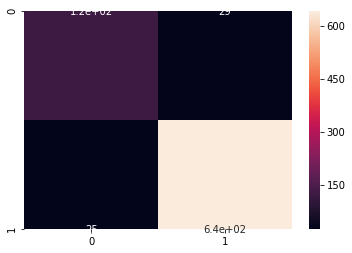

In [48]:
sns.heatmap(cm, annot = True)

In [49]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.83      0.81      0.82       153
           5       0.96      0.96      0.96       665

   micro avg       0.93      0.93      0.93       818
   macro avg       0.89      0.89      0.89       818
weighted avg       0.93      0.93      0.93       818



# Experimenting with tfidf 

What is Tf-idf ?

Tf–idf stands for 'Term Frequency–Inverse Document Frequency' and is a numerical statistic used to reflect how important a word is to a document in a collection or corpus of documents. 
TFIDF is used as a weighting factor during text search processes and text mining.
The intuition behing the TFIDF is as follows: if a word appears several times in a given document, this word might be more important than other words that appeared fewer times in the same document. However, if a given word appeared several times in a given document but also appeared many times in other documents, there is a probability that this word might be common frequent word such as 'I' 'am'..etc. (not really important or meaningful!).

In [50]:
yelp_countvectorizer

<4086x19183 sparse matrix of type '<class 'numpy.int64'>'
	with 317288 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer
yelp_tfidf = TfidfTransformer().fit_transform(yelp_countvectorizer)

In [52]:
print(yelp_tfidf.shape)

(4086, 19183)


In [53]:
print(yelp_tfidf)

  (0, 18957)	0.08918753721261344
  (0, 18913)	0.10141212973949258
  (0, 18832)	0.07997415930748837
  (0, 18723)	0.08147661066101707
  (0, 18651)	0.15721218399208134
  (0, 18482)	0.06777143615969106
  (0, 18479)	0.13324899721826552
  (0, 18083)	0.16299136073704315
  (0, 17575)	0.16299136073704315
  (0, 17344)	0.026006641914470295
  (0, 17331)	0.13876333845118208
  (0, 17305)	0.14632216117334623
  (0, 17295)	0.04965923645283678
  (0, 17201)	0.08157426239953582
  (0, 17163)	0.07288306381223988
  (0, 17152)	0.17440481282833514
  (0, 17142)	0.06590797648614102
  (0, 17126)	0.06848863698125643
  (0, 17121)	0.07000167586623242
  (0, 16804)	0.06641669125732098
  (0, 15753)	0.10987560550650088
  (0, 15740)	0.05385103120258628
  (0, 15145)	0.06777143615969106
  (0, 15055)	0.09886511056633843
  (0, 15040)	0.12157371482957474
  :	:
  (4085, 9116)	0.12301138625537562
  (4085, 9097)	0.10860346820427218
  (4085, 8853)	0.12130480913514378
  (4085, 7990)	0.06906634500131581
  (4085, 7635)	0.05203772947

array([[  0, 151],
       [  0, 667]])

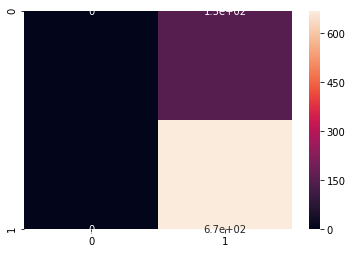

In [54]:
X = yelp_tfidf
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, classification_report
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)
cm